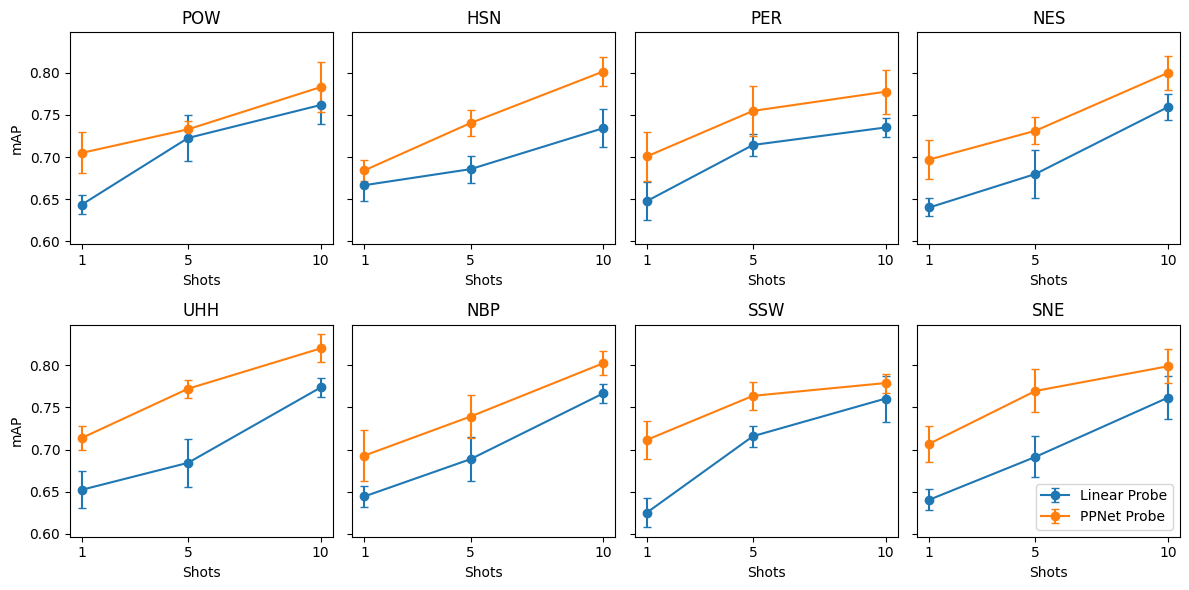

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datasets and shot settings
datasets = ['POW', 'HSN', 'PER', 'NES', 'UHH', 'NBP', 'SSW', 'SNE']
x = np.array([1, 5, 10])  # 1-shot, 5-shot, 10-shot

# Create figure with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6), sharey=True)

# Two models: Linear Probe vs. PPNet Probe
model_names = ['Linear Probe', 'PPNet Probe']

# Generate synthetic data ensuring PPNet is consistently better and increases with shots
np.random.seed(42)
linear_means = np.linspace(0.65, 0.75, len(x))  # Baseline means for Linear Probe
ppnet_means  = linear_means + 0.05                # PPNet is offset to be higher

# Generate a small random fluctuation and error for each dataset and each shot
all_map_values = {model: [] for model in model_names}
all_errors = {model: [] for model in model_names}

for _ in datasets:
    # Generate values with some noise
    linear_vals = linear_means + (np.random.rand(len(x)) - 0.5) * 0.05
    ppnet_vals  = ppnet_means  + (np.random.rand(len(x)) - 0.5) * 0.05
    # Generate synthetic errors (e.g., between 0.01 and 0.03)
    linear_err = np.random.rand(len(x)) * 0.02 + 0.01
    ppnet_err  = np.random.rand(len(x)) * 0.02 + 0.01

    all_map_values['Linear Probe'].append(linear_vals)
    all_map_values['PPNet Probe'].append(ppnet_vals)
    all_errors['Linear Probe'].append(linear_err)
    all_errors['PPNet Probe'].append(ppnet_err)

# Plot each dataset in a 2x4 grid
for i, dataset in enumerate(datasets):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    for model in model_names:
        y = all_map_values[model][i]
        err = all_errors[model][i]
        ax.errorbar(x, y, yerr=err, marker='o', label=model, capsize=3)

    ax.set_title(dataset)
    ax.set_xticks(x)
    ax.set_xlabel("Shots")
    if col == 0:
        ax.set_ylabel("mAP")

# Add a legend to the last subplot (customize the location as needed)
axes[1, 3].legend(loc='lower right')

plt.tight_layout()
plt.show()